In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("SementesAbobora.xlsx")
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,(A) Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,(A) Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,(A) Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,(A) Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,(A) Çerçevelik


In [3]:
df.shape

(2500, 13)

In [4]:
from sklearn.utils import shuffle
df = shuffle(df) #embraralhando os dados da base que parecem estar ordenados por classe

In [5]:
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
22,62165,936.716,356.8281,222.3935,62647,281.3378,0.7820,0.9923,0.7237,0.8903,1.6045,0.7884,(A) Çerçevelik
1530,105193,1329.655,561.8828,238.9633,105966,365.9725,0.9051,0.9927,0.6026,0.7477,2.3513,0.6513,(B) Ürgüp Sivrisi
398,80926,1091.808,422.6966,245.2930,81729,320.9956,0.8144,0.9902,0.7150,0.8531,1.7232,0.7594,(A) Çerçevelik
562,61873,973.254,387.6402,204.9219,62570,280.6762,0.8488,0.9889,0.7289,0.8208,1.8916,0.7241,(A) Çerçevelik
1472,88996,1208.876,497.9698,228.9005,90132,336.6203,0.8881,0.9874,0.7038,0.7653,2.1755,0.6760,(B) Ürgüp Sivrisi


In [6]:
#checando se as classes estão equilibradas
df['Class'].value_counts()

Class
(A) Çerçevelik       1300
(B) Ürgüp Sivrisi    1200
Name: count, dtype: int64

## Análise exploratória dos dados

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

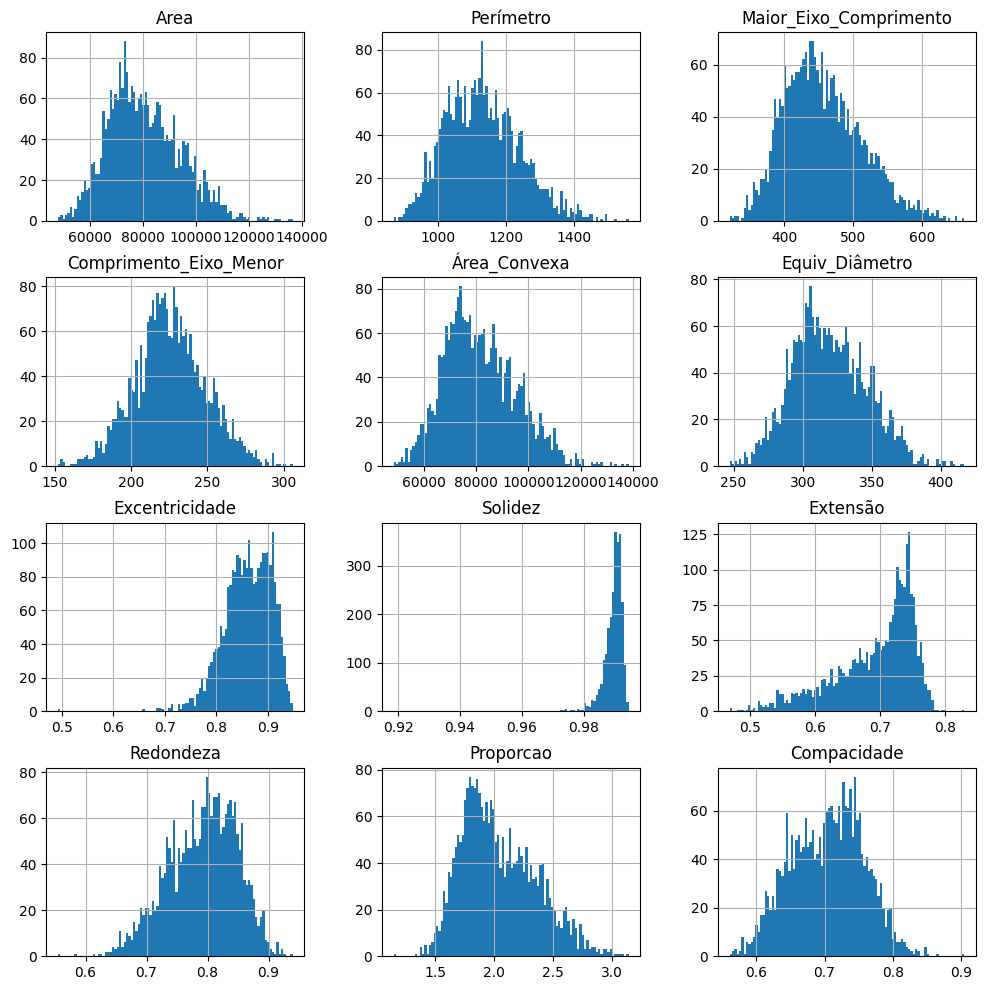

In [8]:
df.hist(bins=100, figsize=(12,12))
plt.show()

In [9]:
import numpy as np
df_num_col = df.select_dtypes(include=[np.number]).columns
df_num = df[df_num_col]

<Axes: >

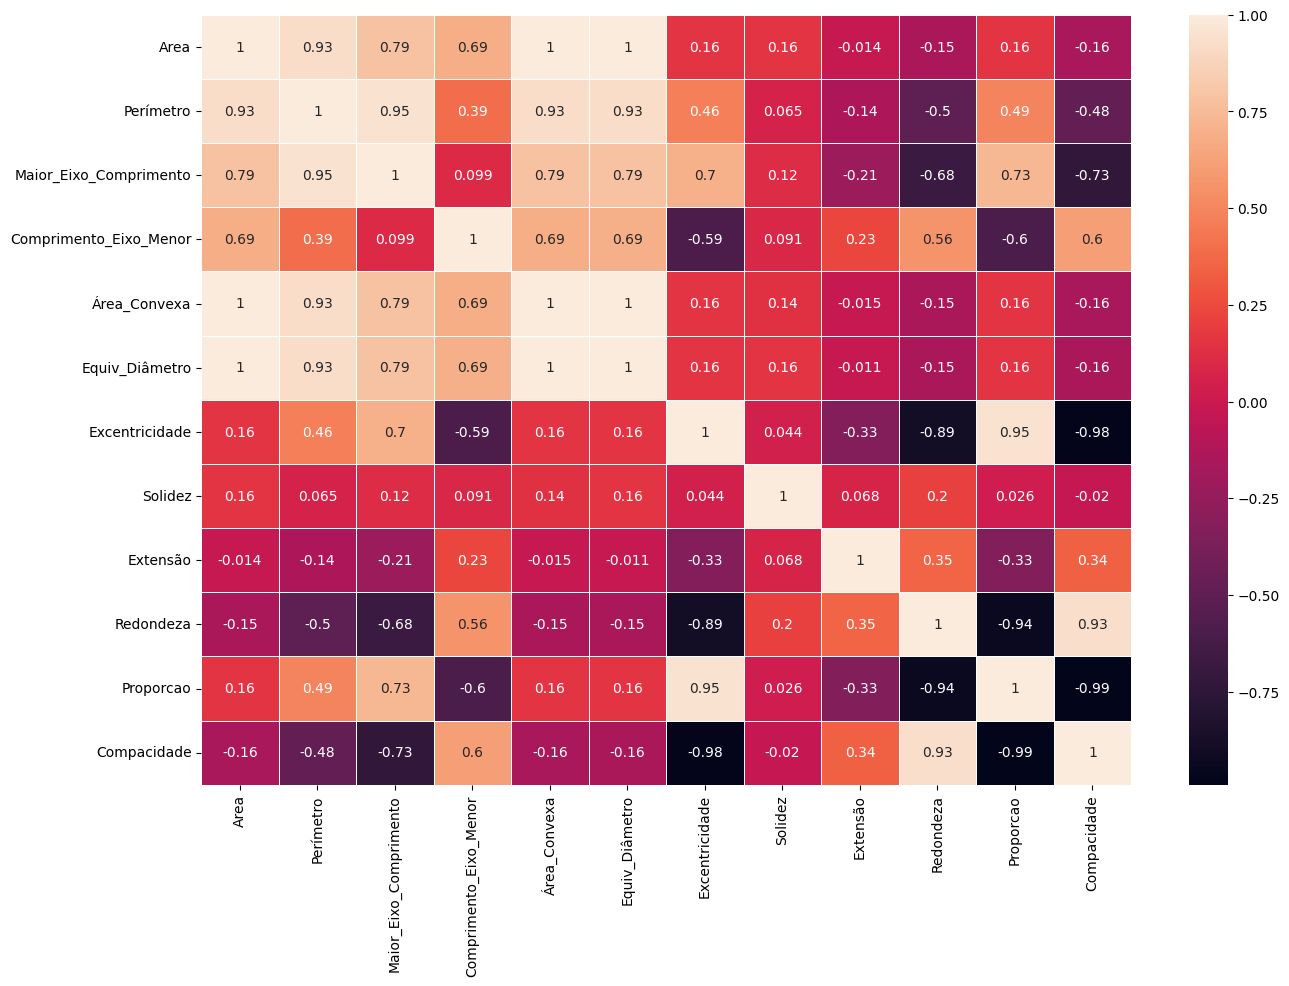

In [10]:
correlation_matrix = df_num.corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## Tratando a variável target

In [11]:
#Label Encoder para transformar a coluna categórica
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df.Class = label_enc.fit_transform(df['Class'])

In [12]:
label_enc.classes_

array(['(A) Çerçevelik ', '(B) Ürgüp Sivrisi'], dtype=object)

In [13]:
set(df['Class']) # transformamos a em uma variável binária

{0, 1}

## Separando os dados em treino e teste

In [14]:
df.columns

Index(['Area', 'Perímetro', 'Maior_Eixo_Comprimento', 'Comprimento_Eixo_Menor',
       'Área_Convexa', 'Equiv_Diâmetro', 'Excentricidade', 'Solidez',
       'Extensão', 'Redondeza', 'Proporcao', 'Compacidade', 'Class'],
      dtype='object')

In [15]:
X = df[['Area','Perímetro','Comprimento_Eixo_Menor','Excentricidade','Solidez','Extensão','Redondeza','Proporcao','Compacidade']]
y = df['Class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Pré-processamento dos dados

In [17]:
# Normalização 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [18]:
#Transform
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
print(f"X_train = {X_train.shape}\nX_test = {X_test.shape}")

X_train = (2000, 9)
X_test = (500, 9)


In [20]:
X_train

array([[-0.91333806, -0.84498719, -0.36532518, ...,  0.11428612,
        -0.56114746,  0.43294624],
       [-0.77895999, -1.06832869,  0.31917998, ...,  1.2135736 ,
        -1.23552844,  1.35066272],
       [ 1.93923987,  1.86463887,  1.48635947, ..., -0.70837145,
        -0.02216344, -0.08182329],
       ...,
       [-0.40810032, -0.62215812,  0.34191744, ...,  0.82122922,
        -0.89117753,  0.90722829],
       [-0.54827888, -0.43234347, -0.59835288, ..., -0.11714282,
         0.13504023, -0.25534111],
       [-1.31134106, -0.79879628, -1.86416732, ..., -1.1368766 ,
         1.11146056, -1.12871415]])

### Moldando nossa variável Target

In [21]:
type(y_train)

pandas.core.series.Series

In [22]:
y_train

1137    0
37      0
1176    0
2178    1
2190    1
       ..
2387    1
91      0
1075    0
2209    1
2416    1
Name: Class, Length: 2000, dtype: int64

In [23]:
#reshape - transformando os valores da nossa variável target em um array -n dimensional (matriz)

In [24]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [25]:
type(y_train)

numpy.ndarray

In [26]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

## Construindo a arquitetura da rede neural multicamadas

In [27]:
import tensorflow as tf

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback

In [28]:
tf.random.set_seed(42)

# definindo entradas da rede e o tamanho da batch de processamento
input_shape = X_train.shape[1] #variáveis de entrada
output_shape = y_train.shape[1] #classe preditora
batch_size = 20

# abrindo uma sequencial de neuronios
model = models.Sequential()

# input layer
model.add(layers.Dense(batch_size, input_shape=(input_shape,), activation='relu'))

# hidden layer
model.add(layers.Dense(12, activation='relu'))

# hidden layer
model.add(layers.Dense(6, activation='relu'))

# aplicando a regularização 
model.add(layers.Dropout(0.5))

# output layer
model.add(layers.Dense(output_shape, activation='sigmoid'))

learning_rate = 0.001 
otimizador = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

model.summary()

/Users/giuliana/Desktop/GitHub/fiap-deeplearning/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 100

hist = model.fit(X_train, 
                 y_train,
                 epochs = epoch, 
                 batch_size=batch_size, 
                 shuffle=True, 
                 validation_data=(X_test, y_test), 
                 verbose=0, 
                 callbacks=[TqdmCallback(verbose=0)])


0epoch [00:00, ?epoch/s]

In [30]:
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")

O modelo possui uma acurácia de 86.75% com 100 epochs de processamento


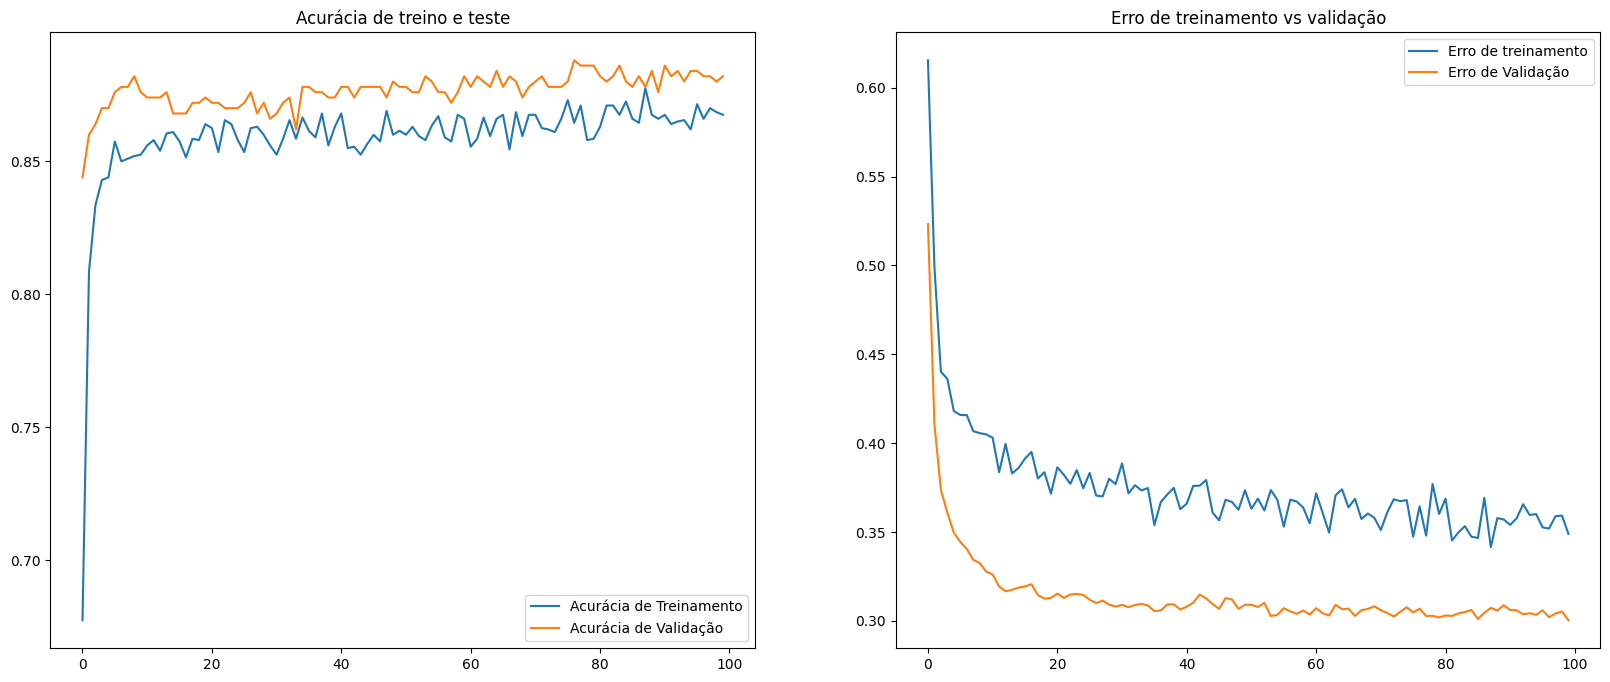

In [31]:
# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [37]:
from sklearn.metrics import classification_report

# Predictions
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# classification report
class_names = []
for i in y.unique():
    class_names.append(label_enc.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
                   precision    recall  f1-score   support

  (A) Çerçevelik        0.87      0.90      0.89       260
(B) Ürgüp Sivrisi       0.89      0.86      0.87       240

         accuracy                           0.88       500
        macro avg       0.88      0.88      0.88       500
     weighted avg       0.88      0.88      0.88       500

